### Need to change cells:
* Calculate factors
* Calculating Factor's Values
* Plotting Prices and Factor's values

In [894]:
import pandas as pd
import os
import time
import patoolib
import gzip
import shutil
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import openpyxl

In [895]:
patoolib.extract_archive(r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz", 
                         outdir=r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\\")

patool: Extracting L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz ...
patool: running "C:\Program Files\7-Zip\7z.EXE" e -oL:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\\ -- L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz


PatoolError: Command `['C:\\Program Files\\7-Zip\\7z.EXE', 'e', '-oL:\\Raw_1_sec_Bar_Data\\FX\\EURUSD\\Pickle\\\\', '--', 'L:\\Raw_1_sec_Bar_Data\\FX\\EURUSD\\Pickle\\EURUSD.pkl.gz']' returned non-zero exit status 255

In [ ]:
df = pd.read_pickle(r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl")
analyzed_df = df["2018-02"]

In [ ]:
df.tail()

### Inspecting one day

In [ ]:
analyzed_df["2018-02-23 09:06:58":"2018-02-23 09:07:02"]

In [ ]:
df["Trading_date_Actual_DateTime"].value_counts()

## Selecting Date and Size

In [1080]:
class Trade_Size:
    size = 20000

trading_date = "2018-03"

start_date = "2018-02-19"
end_date = "2018-09-17"

filter_days = []
filter_hours = range(7,20) # UTC timezone
filter_mins = []
filter_secs = []

#analyzed_df = df[trading_date]
analyzed_df = df.loc[start_date:end_date,:]
analyzed_df.head()

,Open,High,Low,Close,Trading_date_Date,Trading_date_Actual_Time,Trading_date_Actual_DateTime,Trading_date_Sequential_Time,Trading_date_Sequential_DateTime,Trading_date_Sequential_#_Secs
DateTime_UTC,,,,,,,,,,
2018-02-19 00:00:00,1.241175,1.241175,1.24115,1.24115,NaN,00:00:00,nan,01:45:00,nan,6301
2018-02-19 00:00:01,1.241150,1.241175,1.24115,1.24115,NaN,00:00:01,nan,01:45:01,nan,6302
2018-02-19 00:00:02,1.241150,1.241150,1.24115,1.24115,NaN,00:00:02,nan,01:45:02,nan,6303
2018-02-19 00:00:03,1.241150,1.241150,1.24115,1.24115,NaN,00:00:03,nan,01:45:03,nan,6304
2018-02-19 00:00:04,1.241150,1.241150,1.24115,1.24115,NaN,00:00:04,nan,01:45:04,nan,6305


### Resampling into 1 Minute bars

In [1081]:
resample_interval = "30T"

min_1_low = analyzed_df.loc[:,"Low"].resample(resample_interval).apply(np.min)
min_1_high = analyzed_df.loc[:,"High"].resample(resample_interval).apply(np.max)
min_1_open = analyzed_df.loc[:,"Open"].resample(resample_interval).first()
min_1_close = analyzed_df.loc[:,"Close"].resample(resample_interval).last()
min_1_Trading_date_Actual_Time = analyzed_df.loc[:,"Trading_date_Actual_Time"].resample(resample_interval).first()
min_1_Trading_date_Sequential_Time = analyzed_df.loc[:,"Trading_date_Sequential_Time"].resample(resample_interval).first()

min_1_analyzed_df = pd.DataFrame.from_dict({"Open":min_1_open,"High":min_1_high,"Low":min_1_low,"Close":min_1_close,
                                        "Trading_date_Actual_Time":min_1_Trading_date_Actual_Time,
                                        "Trading_date_Sequential_Time":min_1_Trading_date_Sequential_Time})

min_1_analyzed_df.head()

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time
DateTime_UTC,,,,,,
2018-02-19 00:00:00,1.241175,1.242100,1.241100,1.241975,00:00:00,01:45:00
2018-02-19 00:30:00,1.241975,1.242900,1.241925,1.242275,00:30:00,02:15:00
2018-02-19 01:00:00,1.242275,1.243050,1.242225,1.243000,01:00:00,02:45:00
2018-02-19 01:30:00,1.243000,1.243525,1.242550,1.243425,01:30:00,03:15:00
2018-02-19 02:00:00,1.243425,1.243425,1.242875,1.243025,02:00:00,03:45:00


### Calculate factors

In [1082]:
num_of_std_dev = 3

min_1_analyzed_df["Middle_Band"] = min_1_analyzed_df["Close"].rolling(20).mean()
min_1_analyzed_df["Upper_Band"] = min_1_analyzed_df["Middle_Band"] + \
(min_1_analyzed_df["Close"].rolling(20).std()*num_of_std_dev)
min_1_analyzed_df["Lower_Band"] = min_1_analyzed_df["Middle_Band"] - \
(min_1_analyzed_df["Close"].rolling(20).std()*num_of_std_dev)
min_1_analyzed_df["Prev_Lower_Band"] = min_1_analyzed_df["Lower_Band"].shift(1)
min_1_analyzed_df["Prev_Upper_Band"] = min_1_analyzed_df["Upper_Band"].shift(1)
min_1_analyzed_df["Upper_Lower_Band_Span"] = min_1_analyzed_df["Upper_Band"] - min_1_analyzed_df["Lower_Band"]
min_1_analyzed_df["Candle_High_and_Close_above_U_Band"] = min_1_analyzed_df["Close"] > min_1_analyzed_df["Upper_Band"]
min_1_analyzed_df["Prev_Candle_High_and_Close_above_U_Band"] = min_1_analyzed_df["Candle_High_and_Close_above_U_Band"].shift(1)
min_1_analyzed_df.drop("Candle_High_and_Close_above_U_Band",axis=1,inplace=True)
min_1_analyzed_df["Candle_Low_and_Close_below_L_Band"] = min_1_analyzed_df["Close"] < min_1_analyzed_df["Lower_Band"]
min_1_analyzed_df["Prev_Candle_Low_and_Close_below_L_Band"] = min_1_analyzed_df["Candle_Low_and_Close_below_L_Band"].shift(1)
min_1_analyzed_df.drop("Candle_Low_and_Close_below_L_Band",axis=1,inplace=True)
#min_1_analyzed_df["Is_Prev_Cndl_Up"] = ((min_1_analyzed_df["Close"].shift(1) - min_1_analyzed_df["Open"].shift(1)) >= 0)
#min_1_analyzed_df["Is_Prev_Cndl_Down"] = ((min_1_analyzed_df["Close"].shift(1) - min_1_analyzed_df["Open"].shift(1)) < 0)
min_1_analyzed_df["Five_per_std"] = min_1_analyzed_df["Close"].rolling(5).std()
min_1_analyzed_df["Prev_High"] = min_1_analyzed_df["High"].shift(1)
min_1_analyzed_df["Prev_Low"] = min_1_analyzed_df["Low"].shift(1)
min_1_analyzed_df["Seventy_SMA"] = min_1_analyzed_df["Close"].rolling(70).mean()
min_1_analyzed_df["Prev_5_Per_Seventy_SMA"] = min_1_analyzed_df["Seventy_SMA"].shift(5)
# min_1_analyzed_df["SMA10_vs_SMA20"] = min_1_analyzed_df["SMA10"] - min_1_analyzed_df["SMA20"]
# min_1_analyzed_df["SMA10_vs_SMA20_Shifted"] = min_1_analyzed_df["SMA10_vs_SMA20"].shift(1)
min_1_analyzed_df.head(25)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,Prev_Upper_Band,Upper_Lower_Band_Span,Prev_Candle_High_and_Close_above_U_Band,Prev_Candle_Low_and_Close_below_L_Band,Five_per_std,Prev_High,Prev_Low,Seventy_SMA,Prev_5_Per_Seventy_SMA
DateTime_UTC,,,,,,,,,,,,,,,,,,,
2018-02-19 00:00:00,1.241175,1.242100,1.241100,1.241975,00:00:00,01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-19 00:30:00,1.241975,1.242900,1.241925,1.242275,00:30:00,02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,1.242100,1.241100,NaN,NaN
2018-02-19 01:00:00,1.242275,1.243050,1.242225,1.243000,01:00:00,02:45:00,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,1.242900,1.241925,NaN,NaN
2018-02-19 01:30:00,1.243000,1.243525,1.242550,1.243425,01:30:00,03:15:00,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,1.243050,1.242225,NaN,NaN
2018-02-19 02:00:00,1.243425,1.243425,1.242875,1.243025,02:00:00,03:45:00,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.000596,1.243525,1.242550,NaN,NaN
2018-02-19 02:30:00,1.243025,1.243175,1.242425,1.242450,02:30:00,04:15:00,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.000467,1.243425,1.242875,NaN,NaN
2018-02-19 03:00:00,1.242450,1.242700,1.242325,1.242550,03:00:00,04:45:00,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.000396,1.243175,1.242425,NaN,NaN
2018-02-19 03:30:00,1.242550,1.242675,1.241900,1.242100,03:30:00,05:15:00,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.000519,1.242700,1.242325,NaN,NaN
2018-02-19 04:00:00,1.242100,1.242400,1.241725,1.241825,04:00:00,05:45:00,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.000457,1.242675,1.241900,NaN,NaN


In [1083]:
min_1_analyzed_df.dropna(inplace=True)
min_1_analyzed_df.head(35)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,Prev_Upper_Band,Upper_Lower_Band_Span,Prev_Candle_High_and_Close_above_U_Band,Prev_Candle_Low_and_Close_below_L_Band,Five_per_std,Prev_High,Prev_Low,Seventy_SMA,Prev_5_Per_Seventy_SMA
DateTime_UTC,,,,,,,,,,,,,,,,,,,
2018-02-20 13:00:00,1.234625,1.234675,1.233525,1.233975,13:00:00,14:45:00,1.236261,1.242186,1.230337,1.230592,1.242400,0.011849,False,False,0.000582,1.235175,1.233775,1.239303,1.239902
2018-02-20 13:30:00,1.233975,1.234550,1.231975,1.232550,13:30:00,15:15:00,1.235960,1.242143,1.229777,1.230337,1.242186,0.012366,False,False,0.000966,1.234675,1.233525,1.239161,1.239781
2018-02-20 14:00:00,1.232550,1.235975,1.232275,1.235525,14:00:00,15:45:00,1.235795,1.241641,1.229949,1.229777,1.242143,0.011691,False,False,0.001118,1.234550,1.231975,1.239061,1.239675
2018-02-20 14:30:00,1.235525,1.236175,1.234575,1.234625,14:30:00,16:15:00,1.235588,1.241083,1.230092,1.229949,1.241641,0.010992,False,False,0.001104,1.235975,1.232275,1.238954,1.239558
2018-02-20 15:00:00,1.234625,1.235425,1.234225,1.234675,15:00:00,16:45:00,1.235371,1.240335,1.230407,1.230092,1.241083,0.009928,False,False,0.001108,1.236175,1.234575,1.238852,1.239432
2018-02-20 15:30:00,1.234675,1.234875,1.233825,1.234075,15:30:00,17:15:00,1.235149,1.239649,1.230648,1.230407,1.240335,0.009001,False,False,0.001102,1.235425,1.234225,1.238745,1.239303
2018-02-20 16:00:00,1.234075,1.234425,1.232575,1.233625,16:00:00,17:45:00,1.234914,1.238920,1.230907,1.230648,1.239649,0.008013,False,False,0.000715,1.234875,1.233825,1.238634,1.239161
2018-02-20 16:30:00,1.233625,1.235075,1.233525,1.234825,16:30:00,18:15:00,1.234764,1.238203,1.231324,1.230907,1.238920,0.006879,False,False,0.000502,1.234425,1.232575,1.238546,1.239061
2018-02-20 17:00:00,1.234825,1.235775,1.234075,1.235425,17:00:00,18:45:00,1.234646,1.237405,1.231888,1.231324,1.238203,0.005517,False,False,0.000696,1.235075,1.233525,1.238472,1.238954


### Filter for including only certain times of the day

In [1084]:
min_1_analyzed_df = min_1_analyzed_df[min_1_analyzed_df.index.hour.isin(filter_hours)]
min_1_analyzed_df.shape

(2897, 19)

In [1085]:
min_1_analyzed_df["Period_Number"] = range(0,min_1_analyzed_df.shape[0])
min_1_analyzed_df.head(100)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,Prev_Upper_Band,Upper_Lower_Band_Span,Prev_Candle_High_and_Close_above_U_Band,Prev_Candle_Low_and_Close_below_L_Band,Five_per_std,Prev_High,Prev_Low,Seventy_SMA,Prev_5_Per_Seventy_SMA,Period_Number
DateTime_UTC,,,,,,,,,,,,,,,,,,,,
2018-02-20 13:00:00,1.234625,1.234675,1.233525,1.233975,13:00:00,14:45:00,1.236261,1.242186,1.230337,1.230592,1.242400,0.011849,False,False,0.000582,1.235175,1.233775,1.239303,1.239902,0
2018-02-20 13:30:00,1.233975,1.234550,1.231975,1.232550,13:30:00,15:15:00,1.235960,1.242143,1.229777,1.230337,1.242186,0.012366,False,False,0.000966,1.234675,1.233525,1.239161,1.239781,1
2018-02-20 14:00:00,1.232550,1.235975,1.232275,1.235525,14:00:00,15:45:00,1.235795,1.241641,1.229949,1.229777,1.242143,0.011691,False,False,0.001118,1.234550,1.231975,1.239061,1.239675,2
2018-02-20 14:30:00,1.235525,1.236175,1.234575,1.234625,14:30:00,16:15:00,1.235588,1.241083,1.230092,1.229949,1.241641,0.010992,False,False,0.001104,1.235975,1.232275,1.238954,1.239558,3
2018-02-20 15:00:00,1.234625,1.235425,1.234225,1.234675,15:00:00,16:45:00,1.235371,1.240335,1.230407,1.230092,1.241083,0.009928,False,False,0.001108,1.236175,1.234575,1.238852,1.239432,4
2018-02-20 15:30:00,1.234675,1.234875,1.233825,1.234075,15:30:00,17:15:00,1.235149,1.239649,1.230648,1.230407,1.240335,0.009001,False,False,0.001102,1.235425,1.234225,1.238745,1.239303,5
2018-02-20 16:00:00,1.234075,1.234425,1.232575,1.233625,16:00:00,17:45:00,1.234914,1.238920,1.230907,1.230648,1.239649,0.008013,False,False,0.000715,1.234875,1.233825,1.238634,1.239161,6
2018-02-20 16:30:00,1.233625,1.235075,1.233525,1.234825,16:30:00,18:15:00,1.234764,1.238203,1.231324,1.230907,1.238920,0.006879,False,False,0.000502,1.234425,1.232575,1.238546,1.239061,7
2018-02-20 17:00:00,1.234825,1.235775,1.234075,1.235425,17:00:00,18:45:00,1.234646,1.237405,1.231888,1.231324,1.238203,0.005517,False,False,0.000696,1.235075,1.233525,1.238472,1.238954,8


# Testing factor

## Calculating Factor's Values

#### Entry:
Test each of these:
1. Upper or lower BB (3 std for 20 day middle band) breached
2. AND the price needs to get back inside the BB
3. AND the BB outter band span needs to be => 0.0015
---
1. Upper or lower BB (2 std for 20 day middle band) breached
2. AND the price needs to get back inside the BB
3. AND the BB outter band span needs to be => 0.0015
---
1. Upper or lower BB (3 std for 20 day middle band) touched
2. AND the BB outter band span needs to be => 0.0015
---
1. Upper or lower BB (2 std for 20 day middle band) touched
2. AND the BB outter band span needs to be => 0.0015
---
1. Upper or lower BB (3 std for 20 day middle band) touched
2. AND the next candle needs to be red (if looking for short) or green (if looking for long)
3. AND the openning price of the next candle needs to be no more than 40% between the lower/upper band and the middle band
4. AND the BB outter band span needs to be => 0.0015
---
1. Upper or lower BB (2 std for 20 day middle band) touched
2. AND the next candle needs to be red (if looking for short) or green (if looking for long)
3. AND the openning price of the next candle needs to be no more than 40% between the lower/upper band and the middle band
4. AND the BB outter band span needs to be => 0.0015

#### Stop/Exit:
Test each of these:
1. above/below the high/low of the candle that touched/breached BB upper/lower band
2. above/below BB upper/lower band

#### Take profit:
1. 1 pip above(for short)/below (for long) the midle band (SMA)
2. 1 pip above(for short)/below (for long) the lower/upper band
3. 1 pip above(for short)/below (for long) the 50% between middle band (SMA) and lower/upper band
4. 5 pips below entry price
 
#### To make the strategy more profitable:


In [1086]:
class take_profit_stop_distance:
    tpd = 0.0005
    tsd = 0.0001

class pos_open:    
    
    is_position_open = False
    entry_prc = 0
    long_short = ""
    exit_price_on_entry_value = 0
    
    @classmethod
    def position_opened(cls, opened):
        if opened == True:
            cls.is_position_open = True
        else:
            cls.is_position_open = False
    @classmethod
    def entry_price(cls, entry_prcs):
        cls.entry_prc = entry_prcs
    @classmethod
    def long_or_short_entry(cls, long_or_short):
        cls.long_short = long_or_short
    @classmethod
    def exit_price_on_entry(cls, prc):
        cls.exit_price_on_entry_value = prc
        
def enter_factor(row):
    # For long:
    if (row.Upper_Lower_Band_Span >= 0.0015) \
    & (((row.High > row.Upper_Band) \
    & (row.Close < row.Upper_Band)) \
    | ((row.Prev_Candle_High_and_Close_above_U_Band == True) \
    & (row.Low < row.Upper_Band))) \
    & (pos_open.is_position_open == False):
        pos_open.long_or_short_entry("short")
        pos_open.entry_price(row.Upper_Band - 0.0001)
        if row.Prev_Candle_High_and_Close_above_U_Band == True:
            if row.Prev_High > row.High:
                pos_open.exit_price_on_entry (row.Prev_High + 0.0001)
            else:
                pos_open.exit_price_on_entry (row.High + 0.0001)
        else:
            pos_open.exit_price_on_entry (row.High + 0.0001)
        entry = True
    # For short:
    elif (row.Upper_Lower_Band_Span >= 0.0015) \
    & (((row.Low < row.Lower_Band) \
    & (row.Close > row.Lower_Band)) \
    | ((row.Prev_Candle_Low_and_Close_below_L_Band == True) \
    & (row.High > row.Lower_Band))) \
    & (pos_open.is_position_open == False):
        pos_open.long_or_short_entry("long")
        pos_open.entry_price(row.Lower_Band + 0.0001)
        if row.Prev_Candle_Low_and_Close_below_L_Band == True:
            if row.Prev_Low < row.Low:
                pos_open.exit_price_on_entry (row.Prev_Low - 0.0001)
            else:
                pos_open.exit_price_on_entry (row.Low - 0.0001)
        else:
            pos_open.exit_price_on_entry (row.Low - 0.0001)
        entry = True
    else:
        entry = False
    return entry

# (row.Middle_Band-((row.Middle_Band-row.Lower_Band)/2))
# (row.Low < row.Prev_Low)
def take_profit(row):
    # For long:
    # For testing absolute take profit number: if ((row.High > (pos_open.entry_prc + take_profit_stop_distance.tpd)) \
    if (row.High > row.Middle_Band) \
    & (pos_open.long_short == "long") \
    & (pos_open.is_position_open == True):
        take_prft = True
    # For short:
    # For testing absolute take profit number: elif ((row.Low < (pos_open.entry_prc - take_profit_stop_distance.tpd)) \
    elif (row.Low < row.Middle_Band) \
    & (pos_open.long_short == "short") \
    & (pos_open.is_position_open == True):
        take_prft = True
    else:
        take_prft = False
    return take_prft

def stop_loss(row):
    # For long:
    if ((row.Low < pos_open.exit_price_on_entry_value) \
    & (pos_open.long_short == "long") \
    & (pos_open.is_position_open == True)):
        stop_lss = True
    # For short:
    elif ((row.High > pos_open.exit_price_on_entry_value) \
    & (pos_open.long_short == "short") \
    & (pos_open.is_position_open == True)):
        stop_lss = True
    else:
        stop_lss = False
    return stop_lss

def action_func(row):

    #rtn = str(pos_open.is_position_open)
    
    # Enter position
    if enter_factor(row):
        pos_open.position_opened(opened=True)
        #pos_open.entry_price(row.High)
        #rtn = rtn + "_" + str(pos_open.is_position_open)
        return "Entered" + "_" + pos_open.long_short
        #print("3")
    
    # Check if exit criteria has been met
    elif stop_loss(row):
        pos_open.position_opened(opened=False)
        return "Stopped Out" + "_" + pos_open.long_short
    
    # Check if exit criteria has been met
    elif take_profit(row):
        pos_open.position_opened(opened=False)
        #rtn = rtn + "_" + str(pos_open.is_position_open)
        return "Took Profit" + "_" + pos_open.long_short
        
    else:
        #rtn = "else" 
        return "Waiting" #+ "_" + rtn 

min_1_analyzed_df["Action"] = min_1_analyzed_df.apply(action_func, axis=1)

def extract_trade_side(Split_Action):
    if len(Split_Action) > 1:
        return Split_Action[-1]
    else:
        return np.nan

min_1_analyzed_df["Long_Short"] = min_1_analyzed_df["Action"].str.split(pat="_").apply(extract_trade_side)

def trim_trade_side(Split_Action):
    return Split_Action[0]
#     if len(Split_Action) > 1:
#         return Split_Action[1]
#     else:
#         return np.nan

min_1_analyzed_df["Action"] = min_1_analyzed_df["Action"].str.split(pat="_").apply(trim_trade_side)
min_1_analyzed_df.head(50)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,...,Prev_Candle_High_and_Close_above_U_Band,Prev_Candle_Low_and_Close_below_L_Band,Five_per_std,Prev_High,Prev_Low,Seventy_SMA,Prev_5_Per_Seventy_SMA,Period_Number,Action,Long_Short
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,
2018-02-20 13:00:00,1.234625,1.234675,1.233525,1.233975,13:00:00,14:45:00,1.236261,1.242186,1.230337,1.230592,...,False,False,0.000582,1.235175,1.233775,1.239303,1.239902,0,Waiting,NaN
2018-02-20 13:30:00,1.233975,1.234550,1.231975,1.232550,13:30:00,15:15:00,1.235960,1.242143,1.229777,1.230337,...,False,False,0.000966,1.234675,1.233525,1.239161,1.239781,1,Waiting,NaN
2018-02-20 14:00:00,1.232550,1.235975,1.232275,1.235525,14:00:00,15:45:00,1.235795,1.241641,1.229949,1.229777,...,False,False,0.001118,1.234550,1.231975,1.239061,1.239675,2,Waiting,NaN
2018-02-20 14:30:00,1.235525,1.236175,1.234575,1.234625,14:30:00,16:15:00,1.235588,1.241083,1.230092,1.229949,...,False,False,0.001104,1.235975,1.232275,1.238954,1.239558,3,Waiting,NaN
2018-02-20 15:00:00,1.234625,1.235425,1.234225,1.234675,15:00:00,16:45:00,1.235371,1.240335,1.230407,1.230092,...,False,False,0.001108,1.236175,1.234575,1.238852,1.239432,4,Waiting,NaN
2018-02-20 15:30:00,1.234675,1.234875,1.233825,1.234075,15:30:00,17:15:00,1.235149,1.239649,1.230648,1.230407,...,False,False,0.001102,1.235425,1.234225,1.238745,1.239303,5,Waiting,NaN
2018-02-20 16:00:00,1.234075,1.234425,1.232575,1.233625,16:00:00,17:45:00,1.234914,1.238920,1.230907,1.230648,...,False,False,0.000715,1.234875,1.233825,1.238634,1.239161,6,Waiting,NaN
2018-02-20 16:30:00,1.233625,1.235075,1.233525,1.234825,16:30:00,18:15:00,1.234764,1.238203,1.231324,1.230907,...,False,False,0.000502,1.234425,1.232575,1.238546,1.239061,7,Waiting,NaN
2018-02-20 17:00:00,1.234825,1.235775,1.234075,1.235425,17:00:00,18:45:00,1.234646,1.237405,1.231888,1.231324,...,False,False,0.000696,1.235075,1.233525,1.238472,1.238954,8,Waiting,NaN


### Creating dummy date field for charting purposes

In [1087]:
import datetime as dt
### To chart by actual dates on chart's X asis:
#min_1_analyzed_df["New_Date"] = pd.date_range(start="1700-01-01", periods=min_1_analyzed_df.shape[0])

### Charting by intigers (converted to dates on the chart) on X asis:
# min_1_analyzed_df["New_Date"] = range(1, min_1_analyzed_df.shape[0]+1)
# min_1_analyzed_df
min_1_analyzed_df["New_Date"] = [dt.date(1,1,1) + dt.timedelta(days=x) for x in range(1, min_1_analyzed_df.shape[0]+1)]
min_1_analyzed_df

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,...,Prev_Candle_Low_and_Close_below_L_Band,Five_per_std,Prev_High,Prev_Low,Seventy_SMA,Prev_5_Per_Seventy_SMA,Period_Number,Action,Long_Short,New_Date
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,
2018-02-20 13:00:00,1.234625,1.234675,1.233525,1.233975,13:00:00,14:45:00,1.236261,1.242186,1.230337,1.230592,...,False,0.000582,1.235175,1.233775,1.239303,1.239902,0,Waiting,NaN,0001-01-02
2018-02-20 13:30:00,1.233975,1.234550,1.231975,1.232550,13:30:00,15:15:00,1.235960,1.242143,1.229777,1.230337,...,False,0.000966,1.234675,1.233525,1.239161,1.239781,1,Waiting,NaN,0001-01-03
2018-02-20 14:00:00,1.232550,1.235975,1.232275,1.235525,14:00:00,15:45:00,1.235795,1.241641,1.229949,1.229777,...,False,0.001118,1.234550,1.231975,1.239061,1.239675,2,Waiting,NaN,0001-01-04
2018-02-20 14:30:00,1.235525,1.236175,1.234575,1.234625,14:30:00,16:15:00,1.235588,1.241083,1.230092,1.229949,...,False,0.001104,1.235975,1.232275,1.238954,1.239558,3,Waiting,NaN,0001-01-05
2018-02-20 15:00:00,1.234625,1.235425,1.234225,1.234675,15:00:00,16:45:00,1.235371,1.240335,1.230407,1.230092,...,False,0.001108,1.236175,1.234575,1.238852,1.239432,4,Waiting,NaN,0001-01-06
2018-02-20 15:30:00,1.234675,1.234875,1.233825,1.234075,15:30:00,17:15:00,1.235149,1.239649,1.230648,1.230407,...,False,0.001102,1.235425,1.234225,1.238745,1.239303,5,Waiting,NaN,0001-01-07
2018-02-20 16:00:00,1.234075,1.234425,1.232575,1.233625,16:00:00,17:45:00,1.234914,1.238920,1.230907,1.230648,...,False,0.000715,1.234875,1.233825,1.238634,1.239161,6,Waiting,NaN,0001-01-08
2018-02-20 16:30:00,1.233625,1.235075,1.233525,1.234825,16:30:00,18:15:00,1.234764,1.238203,1.231324,1.230907,...,False,0.000502,1.234425,1.232575,1.238546,1.239061,7,Waiting,NaN,0001-01-09
2018-02-20 17:00:00,1.234825,1.235775,1.234075,1.235425,17:00:00,18:45:00,1.234646,1.237405,1.231888,1.231324,...,False,0.000696,1.235075,1.233525,1.238472,1.238954,8,Waiting,NaN,0001-01-10


In [1088]:
# min_1_analyzed_df_analysis = min_1_analyzed_df[min_1_analyzed_df["Action"] != "Waiting"]
# min_1_analyzed_df_analysis

In [1089]:
# writer = pd.ExcelWriter(r"E:\Tst\tst.xlsx")
# min_1_analyzed_df.to_excel(writer,'Sheet1')
# writer.save()

## Plotting Prices and Factor's values

#### Rows and columns to plot

In [1090]:
# Rows to Chart:
#   All:
#   rows_to_chart = min_1_analyzed_df.shape[0]
#   Specific ones ("Period_Number" from table below):
# rows_to_chart = range(min_1_analyzed_df.shape[0])
rows_to_chart = range(60,70)

# Dataframe (Columns) to Chart:
#   For LINE chart:
min_1_analyzed_df_line_chart = min_1_analyzed_df.loc[min_1_analyzed_df.index[rows_to_chart],["Close", "Middle_Band", "Upper_Band", "Lower_Band"]]
#   For CANDLE chart:
min_1_analyzed_df_candle_chart = min_1_analyzed_df.loc[min_1_analyzed_df.index[rows_to_chart],["Open", "High","Low", "Close", "Middle_Band", "Upper_Band", "Lower_Band", "Seventy_SMA"]].set_index(min_1_analyzed_df.loc[min_1_analyzed_df.index[rows_to_chart],'New_Date'])

### Line Chart

In [1091]:
#min_1_analyzed_df_dist_analysis.sort_values(["Trade_Prft_Lss"], ascending=False)

In [1092]:
min_1_analyzed_df_dist_analysis = min_1_analyzed_df[min_1_analyzed_df["Action"] != "Waiting"]
min_1_analyzed_df_dist_analysis

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,...,Prev_Candle_Low_and_Close_below_L_Band,Five_per_std,Prev_High,Prev_Low,Seventy_SMA,Prev_5_Per_Seventy_SMA,Period_Number,Action,Long_Short,New_Date
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,
2018-02-21 07:30:00,1.232325,1.232425,1.231025,1.231600,07:30:00,09:15:00,1.233160,1.235176,1.231144,1.231539,...,False,0.000722,1.233975,1.232225,1.235526,1.236117,15,Entered,long,0001-01-17
2018-02-21 08:00:00,1.231600,1.232550,1.230775,1.231325,08:00:00,09:45:00,1.233033,1.235326,1.230739,1.231144,...,False,0.000898,1.232425,1.231025,1.235391,1.235994,16,Stopped Out,long,0001-01-18
2018-02-21 19:00:00,1.232425,1.235975,1.231525,1.232475,19:00:00,20:45:00,1.232006,1.234457,1.229556,1.229551,...,False,0.000419,1.232775,1.231775,1.233197,1.233545,38,Entered,short,0001-02-09
2018-02-21 19:30:00,1.232475,1.233450,1.229975,1.230225,19:30:00,21:15:00,1.231849,1.234376,1.229322,1.229556,...,False,0.001035,1.235975,1.231525,1.233116,1.233450,39,Took Profit,short,0001-02-10
2018-02-22 07:00:00,1.226575,1.226925,1.225975,1.226675,07:00:00,08:45:00,1.227606,1.229106,1.226107,1.226182,...,False,0.000406,1.227550,1.226025,1.230995,1.231473,40,Entered,long,0001-02-11
2018-02-22 07:30:00,1.226675,1.227925,1.226400,1.227325,07:30:00,09:15:00,1.227555,1.228969,1.226141,1.226107,...,False,0.000402,1.226925,1.225975,1.230905,1.231376,41,Took Profit,long,0001-02-12
2018-02-22 12:30:00,1.228900,1.230875,1.226925,1.226950,12:30:00,14:15:00,1.227939,1.230644,1.225233,1.225376,...,False,0.000836,1.229225,1.228125,1.230179,1.230559,51,Entered,short,0001-02-22
2018-02-22 13:00:00,1.226950,1.229225,1.226475,1.229025,13:00:00,14:45:00,1.228004,1.230800,1.225208,1.225233,...,False,0.000836,1.230875,1.226925,1.230109,1.230494,52,Took Profit,short,0001-02-23
2018-02-22 14:00:00,1.231325,1.233475,1.230525,1.232550,14:00:00,15:45:00,1.228426,1.233015,1.223837,1.224620,...,False,0.002203,1.231525,1.228275,1.230069,1.230345,54,Entered,short,0001-02-25


### Candlestick Chart

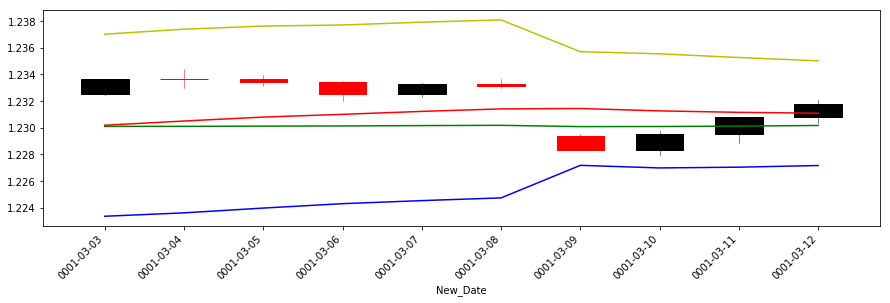

In [1094]:
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12
hourFormatter = DateFormatter('%h')

fig1 = plt.figure(figsize=(15,15))
ax10 = plt.subplot(3,1,1)
fig1.subplots_adjust(bottom=0.2)
# ax10.xaxis.set_major_locator(mondays)
# ax10.xaxis.set_minor_locator(alldays)
# ax10.xaxis.set_major_formatter(dayFormatter)
ax10.xaxis.set_minor_formatter(hourFormatter)

### Charting by actual dates on X asis:
candlestick_ohlc(ax10, zip(mdates.date2num(min_1_analyzed_df_candle_chart.index),
                         min_1_analyzed_df_candle_chart['Open'], min_1_analyzed_df_candle_chart['High'],
                         min_1_analyzed_df_candle_chart['Low'], min_1_analyzed_df_candle_chart['Close']), width=0.6)
### Charting by intigers (converted to dates on the chart) on X asis:
# candlestick_ohlc(ax10, zip(min_1_analyzed_df_candle_chart.index,
#                           min_1_analyzed_df_candle_chart['Open'], min_1_analyzed_df_candle_chart['High'],
#                           min_1_analyzed_df_candle_chart['Low'], min_1_analyzed_df_candle_chart['Close']), width=0.6)
                           
min_1_analyzed_df_candle_chart["Middle_Band"].plot(ax=ax10, color="r")
min_1_analyzed_df_candle_chart["Upper_Band"].plot(ax=ax10, color="y")
min_1_analyzed_df_candle_chart["Lower_Band"].plot(ax=ax10, color="b")
min_1_analyzed_df_candle_chart["Seventy_SMA"].plot(ax=ax10, color="g")

ax10.xaxis_date()
ax10.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

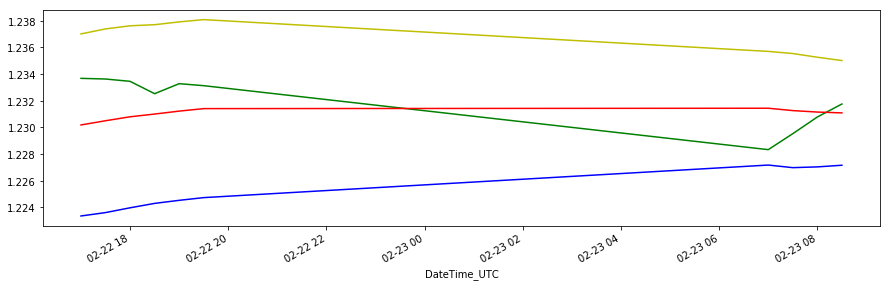

In [1093]:
#%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot(3,1,1)
# Close price
min_1_analyzed_df_line_chart["Close"].plot(ax=ax1, color="g")
#min_1_analyzed_df.iloc[rows_to_chart,3:4].plot(ax=ax1, color="g")
ax2 = plt.subplot(3,1,1)
# Middle band (20SMA)
min_1_analyzed_df_line_chart["Middle_Band"].plot(ax=ax1, color="r")
#min_1_analyzed_df.iloc[rows_to_chart,6:7].plot(ax=ax1, color="r")
ax3 = plt.subplot(3,1,1)
# Upper band
min_1_analyzed_df_line_chart["Upper_Band"].plot(ax=ax1, color="y")
#min_1_analyzed_df.iloc[rows_to_chart,7:8].plot(ax=ax1, color="y")
# Lower band
min_1_analyzed_df_line_chart["Lower_Band"].plot(ax=ax1, color="b")
#min_1_analyzed_df.iloc[rows_to_chart,8:9].plot(ax=ax1, color="b")
plt.show()

## Calculating Factor's Profit and Loss

In [1095]:
# class long_or_short_cls:
#     # Long = 0
#     # Short = 1
#     long_or_short = 0

class Pos_Open:
    is_position_open = False
    @classmethod
    def position_opened(cls, opened):
        if opened == True:
            cls.is_position_open = True
        else:
            cls.is_position_open = False
        
class Prft_lss_calc:
    entry_value = 0
    exit_value = 0
    prft_lss = 0
    stop_price_at_entry = 0
    
    def round_down(self, n):
        return (np.floor(n*100))/100
        
    @classmethod
    def add_to_pos(cls, high_price, low_price, upper_band, lower_band, long_or_short):
        #For long:
        if long_or_short == "long":
            cls.entry_value = (lower_band+0.0001)*Trade_Size.size 
            cls.stop_price_at_entry = low_price
        #For short:
        else:
            cls.entry_value = (upper_band-0.0001)*Trade_Size.size
            cls.stop_price_at_entry = high_price

    def prft_lss_cal_stopped_out(self, price, long_or_short):
        self.exit_value = price*Trade_Size.size
        # for long
        if long_or_short == "long":
            self.prft_lss = self.round_down(self.exit_value - Prft_lss_calc.entry_value)
        # for short
        else:
            self.prft_lss = self.round_down(Prft_lss_calc.entry_value - self.exit_value)
        return self.prft_lss
    
    def prft_lss_cal_took_prft(self, price, long_or_short):
        self.exit_value = price*Trade_Size.size
        # for long
        if long_or_short == "long":
            self.prft_lss = self.round_down(self.exit_value - Prft_lss_calc.entry_value)
        # for short
        else:
            self.prft_lss = self.round_down(Prft_lss_calc.entry_value - self.exit_value)
        return self.prft_lss
        
def trd_price_and_prft(row):
    
    p_l_calc = Prft_lss_calc()
    
    if (row.Action == "Entered") & (Pos_Open.is_position_open == False):
        p_l_calc.add_to_pos(row.High, row.Low, row.Upper_Band, row.Lower_Band, row.Long_Short)
        Pos_Open.position_opened(True)
        return [p_l_calc.entry_value,0]
    
    elif ((row.Action == "Took Profit") | (row.Action == "Stopped Out")) & (Pos_Open.is_position_open == True):
#         Prft_lss_calc.close_pos(row.High)
        Pos_Open.position_opened(False)
        # if Took Profit
        if row.Action == "Took Profit":
            # for long:
            if row.Long_Short == "long":
                pric = row.Middle_Band-0.0001
            # for short:
            else:
                pric = row.Middle_Band+0.0001
            #list_to_return = 
            return [pric, p_l_calc.prft_lss_cal_took_prft(pric, row.Long_Short)]
        # if Stopped Out
        else:
            # for long:
            if row.Long_Short == "long":
                stopped_pric = p_l_calc.stop_price_at_entry - 0.0002
            # for short:
            else:
                stopped_pric = p_l_calc.stop_price_at_entry + 0.0002
            #list_to_return_1 = 
            return [stopped_pric, p_l_calc.prft_lss_cal_stopped_out(stopped_pric, row.Long_Short)]
    
    else:
        return[np.NaN,0]

min_1_analyzed_df["Trade_Prc_and_Prft"] = min_1_analyzed_df.apply(trd_price_and_prft, axis=1)

# def extract_prft_lss(Trade_Prc_and_Prft):
#     if len(Split_Action) > 1:
#         return Split_Action[-1]
#     else:
#         return np.nan

min_1_analyzed_df["Trade_Prft_Lss"] = min_1_analyzed_df["Trade_Prc_and_Prft"].apply(lambda x: x[1])
min_1_analyzed_df.head(80)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,...,Prev_High,Prev_Low,Seventy_SMA,Prev_5_Per_Seventy_SMA,Period_Number,Action,Long_Short,New_Date,Trade_Prc_and_Prft,Trade_Prft_Lss
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,
2018-02-20 13:00:00,1.234625,1.234675,1.233525,1.233975,13:00:00,14:45:00,1.236261,1.242186,1.230337,1.230592,...,1.235175,1.233775,1.239303,1.239902,0,Waiting,NaN,0001-01-02,"[nan, 0]",0.00
2018-02-20 13:30:00,1.233975,1.234550,1.231975,1.232550,13:30:00,15:15:00,1.235960,1.242143,1.229777,1.230337,...,1.234675,1.233525,1.239161,1.239781,1,Waiting,NaN,0001-01-03,"[nan, 0]",0.00
2018-02-20 14:00:00,1.232550,1.235975,1.232275,1.235525,14:00:00,15:45:00,1.235795,1.241641,1.229949,1.229777,...,1.234550,1.231975,1.239061,1.239675,2,Waiting,NaN,0001-01-04,"[nan, 0]",0.00
2018-02-20 14:30:00,1.235525,1.236175,1.234575,1.234625,14:30:00,16:15:00,1.235588,1.241083,1.230092,1.229949,...,1.235975,1.232275,1.238954,1.239558,3,Waiting,NaN,0001-01-05,"[nan, 0]",0.00
2018-02-20 15:00:00,1.234625,1.235425,1.234225,1.234675,15:00:00,16:45:00,1.235371,1.240335,1.230407,1.230092,...,1.236175,1.234575,1.238852,1.239432,4,Waiting,NaN,0001-01-06,"[nan, 0]",0.00
2018-02-20 15:30:00,1.234675,1.234875,1.233825,1.234075,15:30:00,17:15:00,1.235149,1.239649,1.230648,1.230407,...,1.235425,1.234225,1.238745,1.239303,5,Waiting,NaN,0001-01-07,"[nan, 0]",0.00
2018-02-20 16:00:00,1.234075,1.234425,1.232575,1.233625,16:00:00,17:45:00,1.234914,1.238920,1.230907,1.230648,...,1.234875,1.233825,1.238634,1.239161,6,Waiting,NaN,0001-01-08,"[nan, 0]",0.00
2018-02-20 16:30:00,1.233625,1.235075,1.233525,1.234825,16:30:00,18:15:00,1.234764,1.238203,1.231324,1.230907,...,1.234425,1.232575,1.238546,1.239061,7,Waiting,NaN,0001-01-09,"[nan, 0]",0.00
2018-02-20 17:00:00,1.234825,1.235775,1.234075,1.235425,17:00:00,18:45:00,1.234646,1.237405,1.231888,1.231324,...,1.235075,1.233525,1.238472,1.238954,8,Waiting,NaN,0001-01-10,"[nan, 0]",0.00


In [1096]:
#min_1_analyzed_df[min_1_analyzed_df["Period_Number"] > 240]

In [1097]:
min_1_analyzed_df_dist_analysis = min_1_analyzed_df[min_1_analyzed_df["Action"] != "Waiting"]
min_1_analyzed_df_dist_analysis
# min_1_analyzed_df_dist_analysis[min_1_analyzed_df_dist_analysis["Trade_Prft_Lss"]>=0]

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,...,Prev_High,Prev_Low,Seventy_SMA,Prev_5_Per_Seventy_SMA,Period_Number,Action,Long_Short,New_Date,Trade_Prc_and_Prft,Trade_Prft_Lss
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,
2018-02-21 07:30:00,1.232325,1.232425,1.231025,1.231600,07:30:00,09:15:00,1.233160,1.235176,1.231144,1.231539,...,1.233975,1.232225,1.235526,1.236117,15,Entered,long,0001-01-17,"[24624.887862608346, 0]",0.00
2018-02-21 08:00:00,1.231600,1.232550,1.230775,1.231325,08:00:00,09:45:00,1.233033,1.235326,1.230739,1.231144,...,1.232425,1.231025,1.235391,1.235994,16,Stopped Out,long,0001-01-18,"[1.230825, -8.39]",-8.39
2018-02-21 19:00:00,1.232425,1.235975,1.231525,1.232475,19:00:00,20:45:00,1.232006,1.234457,1.229556,1.229551,...,1.232775,1.231775,1.233197,1.233545,38,Entered,short,0001-02-09,"[24687.135437932688, 0]",0.00
2018-02-21 19:30:00,1.232475,1.233450,1.229975,1.230225,19:30:00,21:15:00,1.231849,1.234376,1.229322,1.229556,...,1.235975,1.231525,1.233116,1.233450,39,Took Profit,short,0001-02-10,"[1.2319487500000004, 48.16]",48.16
2018-02-22 07:00:00,1.226575,1.226925,1.225975,1.226675,07:00:00,08:45:00,1.227606,1.229106,1.226107,1.226182,...,1.227550,1.226025,1.230995,1.231473,40,Entered,long,0001-02-11,"[24524.13733806269, 0]",0.00
2018-02-22 07:30:00,1.226675,1.227925,1.226400,1.227325,07:30:00,09:15:00,1.227555,1.228969,1.226141,1.226107,...,1.226925,1.225975,1.230905,1.231376,41,Took Profit,long,0001-02-12,"[1.2274550000000002, 24.96]",24.96
2018-02-22 12:30:00,1.228900,1.230875,1.226925,1.226950,12:30:00,14:15:00,1.227939,1.230644,1.225233,1.225376,...,1.229225,1.228125,1.230179,1.230559,51,Entered,short,0001-02-22,"[24610.88557757324, 0]",0.00
2018-02-22 13:00:00,1.226950,1.229225,1.226475,1.229025,13:00:00,14:45:00,1.228004,1.230800,1.225208,1.225233,...,1.230875,1.226925,1.230109,1.230494,52,Took Profit,short,0001-02-23,"[1.2281037500000003, 48.81]",48.81
2018-02-22 14:00:00,1.231325,1.233475,1.230525,1.232550,14:00:00,15:45:00,1.228426,1.233015,1.223837,1.224620,...,1.231525,1.228275,1.230069,1.230345,54,Entered,short,0001-02-25,"[24658.309254325857, 0]",0.00


### P&L time distribution

#### Prep

In [1098]:
min_1_analyzed_df_dist_analysis["Trade_Entry_Time"] = min_1_analyzed_df_dist_analysis.index
min_1_analyzed_df_dist_analysis["Trade_Entry_Time_Shifted"] = min_1_analyzed_df_dist_analysis["Trade_Entry_Time"].shift(1)
min_1_analyzed_df_dist_analysis.drop("Trade_Entry_Time",axis=1, inplace=True)
min_1_analyzed_df_dist_analysis_exists_only = min_1_analyzed_df_dist_analysis.loc[min_1_analyzed_df_dist_analysis \
["Action"] == "Took Profit",:]
min_1_analyzed_df_dist_analysis_exists_only["Hour_of_Entry"] = min_1_analyzed_df_dist_analysis_exists_only \
["Trade_Entry_Time_Shifted"].apply(lambda x: x.hour)

c:\python 3.7\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python 3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python 3.7\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

In [1099]:
min_1_analyzed_df_dist_analysis_exists_only

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,...,Seventy_SMA,Prev_5_Per_Seventy_SMA,Period_Number,Action,Long_Short,New_Date,Trade_Prc_and_Prft,Trade_Prft_Lss,Trade_Entry_Time_Shifted,Hour_of_Entry
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,
2018-02-21 19:30:00,1.232475,1.233450,1.229975,1.230225,19:30:00,21:15:00,1.231849,1.234376,1.229322,1.229556,...,1.233116,1.233450,39,Took Profit,short,0001-02-10,"[1.2319487500000004, 48.16]",48.16,2018-02-21 19:00:00,19
2018-02-22 07:30:00,1.226675,1.227925,1.226400,1.227325,07:30:00,09:15:00,1.227555,1.228969,1.226141,1.226107,...,1.230905,1.231376,41,Took Profit,long,0001-02-12,"[1.2274550000000002, 24.96]",24.96,2018-02-22 07:00:00,7
2018-02-22 13:00:00,1.226950,1.229225,1.226475,1.229025,13:00:00,14:45:00,1.228004,1.230800,1.225208,1.225233,...,1.230109,1.230494,52,Took Profit,short,0001-02-23,"[1.2281037500000003, 48.81]",48.81,2018-02-22 12:30:00,12
2018-02-28 16:30:00,1.220925,1.222125,1.220625,1.221075,16:30:00,18:15:00,1.221578,1.224477,1.218678,1.218524,...,1.225066,1.225927,129,Took Profit,long,0001-05-11,"[1.2214775000000002, 45.08]",45.08,2018-02-28 15:00:00,15
2018-03-01 08:00:00,1.220075,1.220575,1.219275,1.220225,08:00:00,09:45:00,1.219433,1.221222,1.217643,1.217695,...,1.221116,1.221340,138,Took Profit,short,0001-05-20,"[1.2195325000000006, 27.52]",27.52,2018-03-01 07:00:00,7
2018-03-02 08:30:00,1.226625,1.227875,1.226625,1.227425,08:30:00,10:15:00,1.227185,1.229131,1.225239,1.225239,...,1.222204,1.221730,165,Took Profit,long,0001-06-16,"[1.2270850000000004, 34.49]",34.49,2018-03-02 07:30:00,7
2018-03-07 11:30:00,1.242525,1.242575,1.240775,1.240775,11:30:00,13:15:00,1.241835,1.244049,1.239621,1.239757,...,1.239202,1.238607,215,Took Profit,short,0001-08-05,"[1.2419350000000005, 37.07]",37.07,2018-03-07 10:30:00,10
2018-03-08 14:00:00,1.240275,1.240475,1.237925,1.237925,14:00:00,15:45:00,1.239569,1.244089,1.235048,1.235280,...,1.240637,1.240742,246,Took Profit,short,0001-09-05,"[1.2396687500000005, 87.43]",87.43,2018-03-08 13:30:00,13
2018-03-09 14:30:00,1.229925,1.231375,1.229325,1.231225,14:30:00,16:15:00,1.230591,1.233777,1.227406,1.227398,...,1.233640,1.234398,273,Took Profit,long,0001-10-02,"[1.2304912500000003, 58.43]",58.43,2018-03-09 13:30:00,13


#### Time distribution of Profits

AxesSubplot(0.125,0.125;0.775x0.755)


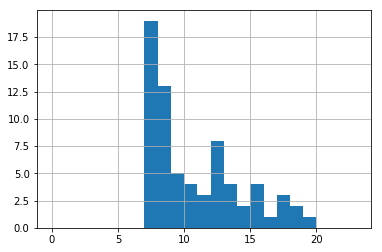

In [1100]:
print(min_1_analyzed_df_dist_analysis_exists_only[min_1_analyzed_df_dist_analysis_exists_only["Trade_Prft_Lss"]>0] \
["Hour_of_Entry"].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,23]))

#### Time distribution of losses

AxesSubplot(0.125,0.125;0.775x0.755)


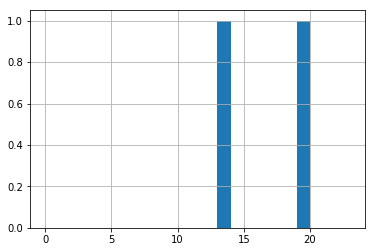

In [1101]:
print(min_1_analyzed_df_dist_analysis_exists_only[min_1_analyzed_df_dist_analysis_exists_only["Trade_Prft_Lss"]<=0] \
["Hour_of_Entry"].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))

## Result (P & L)

# of Trades: 151
        Count    Average
Loss       79  39.998056
Profit     72 -12.002658
Gross P&L: 1931.6499999999999 (9.658249999999999%)
Commission: 302
Slippage: 302.0
Net P&L: 1327.6499999999999 (6.638249999999999%)


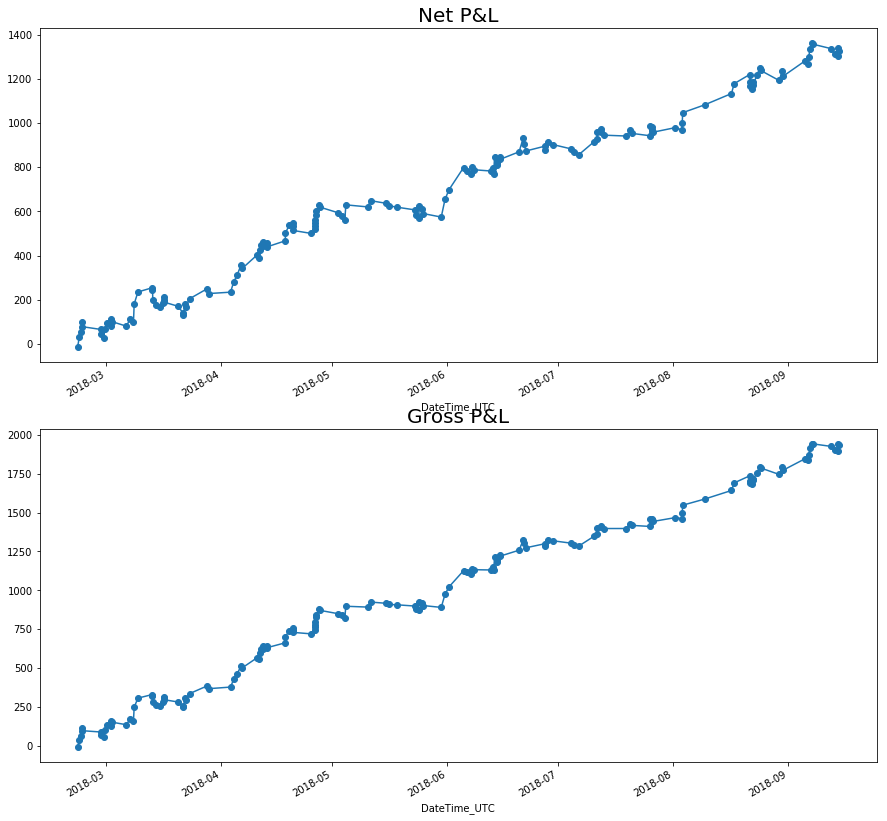

In [1102]:
# Gross P&L:
gross_absolute_profit_loss = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].sum()
gross_percent_profit_loss = (gross_absolute_profit_loss/Trade_Size.size)*100

# Commission:
commission = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()*2

#Slippage:
slippage = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()*(Trade_Size.size/10000)

# Net P&L:
net_absolute_profit_loss = gross_absolute_profit_loss - commission - slippage
net_percent_profit_loss = (net_absolute_profit_loss/Trade_Size.size)*100

# Number of trades:
num_of_trades = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()

profit_vs_loss = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"] > 0
profit_vs_loss.replace({True:"Profit",False:"Loss"}, inplace=True)
s = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"]
P_N_L_Stats = pd.DataFrame({"Count":profit_vs_loss.value_counts().values,"Average":[s[s>0].mean(), 
s[s<0].mean()]},index=profit_vs_loss.value_counts().index)

print("# of Trades: {}".format(num_of_trades))
print(P_N_L_Stats)
print("Gross P&L: {} ({}%)".format(gross_absolute_profit_loss,gross_percent_profit_loss))
print("Commission: {}".format(commission))
print("Slippage: {}".format(slippage))
print("Net P&L: {} ({}%)".format(net_absolute_profit_loss,net_percent_profit_loss))

# Charting P&L:
pnl_chart_df = min_1_analyzed_df["Trade_Prft_Lss"].replace(0,np.NaN)
pnl_chart_df_cumsum = pnl_chart_df[pnl_chart_df < 1000000000].cumsum()
pnl_chart_df_less_comm_and_slip = pnl_chart_df - 2 - Trade_Size.size/10000
pnl_chart_df_less_comm_and_slip_cumsum = pnl_chart_df_less_comm_and_slip[pnl_chart_df_less_comm_and_slip < 1000000000].cumsum()

fig1 = plt.figure(figsize=(15,15))
ax4 = plt.subplot(2,1,1)
ax4.set_title("Net P&L", fontsize=20)
pnl_chart_df_less_comm_and_slip_cumsum.plot(ax=ax4, linestyle="-", marker="o")
ax5 = plt.subplot(2,1,2)
ax5.set_title("Gross P&L", fontsize=20)
pnl_chart_df_cumsum.plot(ax=ax5, linestyle="-", marker="o")
plt.show()
# ax2 = plt.subplot(3,1,1)
# min_1_analyzed_df["SMA10"].head(100).plot(ax=ax1, color="r")
# ax3 = plt.subplot(3,1,1)
# min_1_analyzed_df["SMA20"].head(100).plot(ax=ax1, color="y")